## Lending  Loss Case Study - By Saravanakumar PERUMAL

#### Import necessory pyton libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import plotly.express as px
import time 


In [2]:
print("- numpy library - version",np.__version__)
print("- pandas library - version",pd.__version__)
print("- matplotlib library - version",plotlib.__version__)
print("- seaborn library - version",sns.__version__)
print("- plotly library - version",plotly.__version__)


- numpy library - version 1.26.4
- pandas library - version 2.2.1
- matplotlib library - version 3.8.3
- seaborn library - version 0.13.2
- plotly library - version 5.22.0


## 1)  Data understanding  (10%)


#### Import the data set "loan.csv" and understand the columns and summary

In [3]:
df = pd.read_csv("loan.csv",low_memory=False) #low_memory=FalsePandas reads the entire file at once. This can be slower for large files but ensures more accurate data type inference.


#### Check Various columns from loan.csv
1) No of Columns
2) Rows

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
len(df.columns)

111

In [6]:
df.shape

(39717, 111)

In [7]:
df.shape

(39717, 111)

## 2) Data Cleaning and Manipulation (20%)

In [8]:
df.drop_duplicates() #drop the rows if it contains duplicate info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(df.columns) # tola 111 columns in the data set

111

In [10]:
df = df.dropna(axis=1, how='all') #drop the all the columns which contans only NA

In [11]:
len(df.columns) # It remains only 57 columns after dropping the NA columns


57

In [12]:
df.columns  #Check columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [13]:
#df.to_csv("loan_afternadrop.csv")  # exprt and check the data

In [14]:
# Drop those columns contails only NAN or 0 (zero)
for col in df.columns : 
    if( (sum(df[col].isnull()) + sum(df[col].eq(0) ))  ==  df.shape[0] ) :
       df = df.drop([col], axis=1)

In [15]:
df.shape # We have 52 Columns after removing NAN columns and Columns having only zero / NAN


(39717, 52)

In [16]:
#df.to_csv("loan_ZeroAndNAdrop.csv")  # exprt and check the data

In [17]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

In [19]:
 #Clean % from interest rate
df.int_rate =df.int_rate.apply(lambda x : x.replace('%',''))
df.int_rate = df.int_rate.astype(float)

In [20]:
 #Clean emp_length 
df.emp_length.dtype
df.emp_length = df.emp_length.astype(str)

In [21]:
df.emp_length.dtype

dtype('O')

In [22]:
df.emp_length =df.emp_length.apply(lambda x : x.replace('10+ years','10'))
df.emp_length =df.emp_length.apply(lambda x : x.replace('< 1 year','0'))
df.emp_length =df.emp_length.apply(lambda x : x.replace('1 year','1'))
df.emp_length =df.emp_length.apply(lambda x : x.replace('years',''))

In [23]:
df.emp_length.unique()

array(['10', '0', '1', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       'nan'], dtype=object)

In [24]:
df.emp_length.describe()

count     39717
unique       12
top          10
freq       8879
Name: emp_length, dtype: object

In [25]:
df.emp_length.value_counts()

emp_length
10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: count, dtype: int64

In [26]:
#df.emp_length = df['emp_length'].fillna(5) #replace Nan with 10 -- mode of emp_length

In [27]:
df.emp_length =df.emp_length.apply(lambda x : x.replace('nan','5')) # replace nan with mean of 5 years

In [28]:
df.emp_length.value_counts()

emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
5     1075
Name: count, dtype: int64

In [29]:
df.emp_length = df.emp_length.astype(int)

In [30]:
df.emp_length.describe()

count    39717.000000
mean         4.974167
std          3.514038
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [81]:
df.verification_status.value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

# 3) Data analysis (40%)

## a) Analysis on whole data set (Fully Paid, Current, Charged Off)

### Univariate Analysis

In [31]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [32]:
loan_status_counts = df['loan_status'].value_counts()

In [33]:
loan_status_counts.index

Index(['Fully Paid', 'Charged Off', 'Current'], dtype='object', name='loan_status')

In [34]:
loan_status_counts.values

array([32950,  5627,  1140], dtype=int64)

([<matplotlib.patches.Wedge at 0x1e34b1a1670>,
 [Text(-0.9461463603310625, 0.5610767013807324, 'Fully Paid'),
  Text(0.8917767100735345, -0.6439986796340682, 'Charged Off'),
  Text(1.095530865684762, -0.0990561574663404, 'Current')],
 [Text(-0.5160798329078522, 0.3060418371167631, '83.0%'),
  Text(0.4864236600401097, -0.3512720070731281, '14.2%'),
  Text(0.5975622903735064, -0.054030631345276574, '2.9%')])

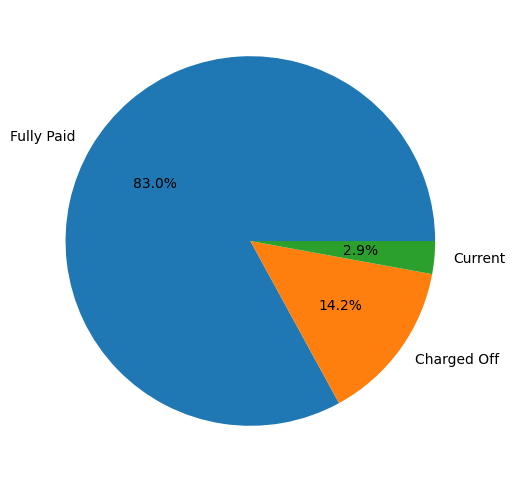

In [35]:
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct="%1.1f%%") 

([<matplotlib.patches.Wedge at 0x1e34c7d6270>,
 [Text(-0.7341147929552924, 0.8191919620969241, ' 36 months'),
  Text(0.7341148696535762, -0.8191918933641329, ' 60 months')],
 [Text(-0.4004262507028867, 0.446831979325595, '73.3%'),
  Text(0.40042629253831424, -0.44683194183498154, '26.7%')])

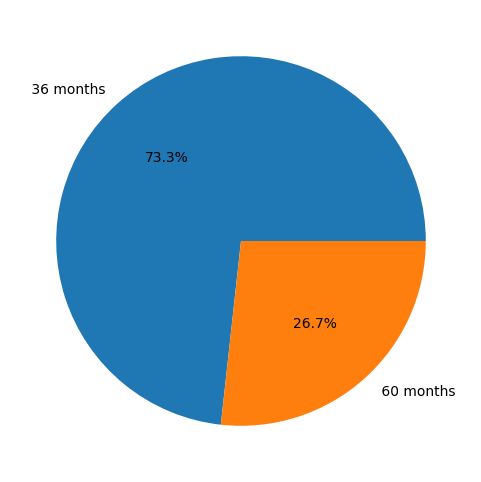

In [36]:
loan_term_counts = df['term'].value_counts()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(loan_term_counts.values, labels=loan_term_counts.index, autopct="%1.1f%%") 

In [37]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Text(0, 0.5, 'Interest Rate')

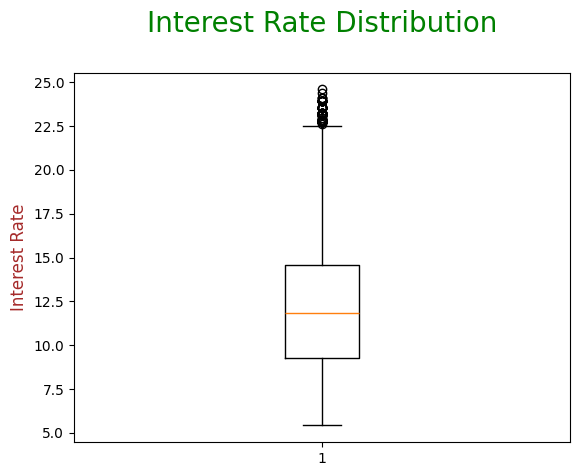

In [38]:
# Interest rate box plot
plt.boxplot(df.int_rate)
plt.title("Interest Rate Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

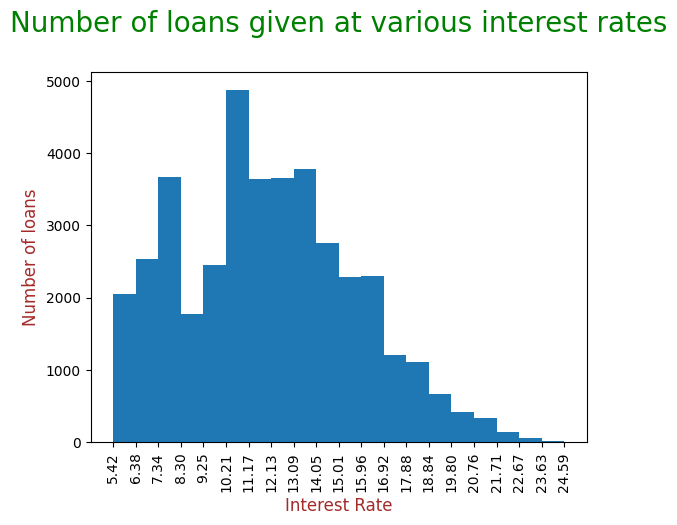

In [39]:
df.int_rate = df.int_rate.astype(float)
out1,bins,out2  = plt.hist(df.int_rate, bins =20)
plt.xticks(bins, rotation=90)
plt.title("Number of loans given at various interest rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})


In [40]:
df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

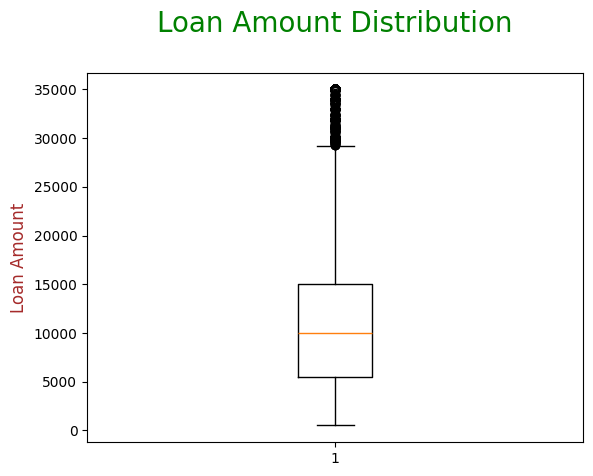

In [41]:
# Loan amout box plot
plt.boxplot(df.loan_amnt)
plt.title("Loan Amount Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Loan Amount', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

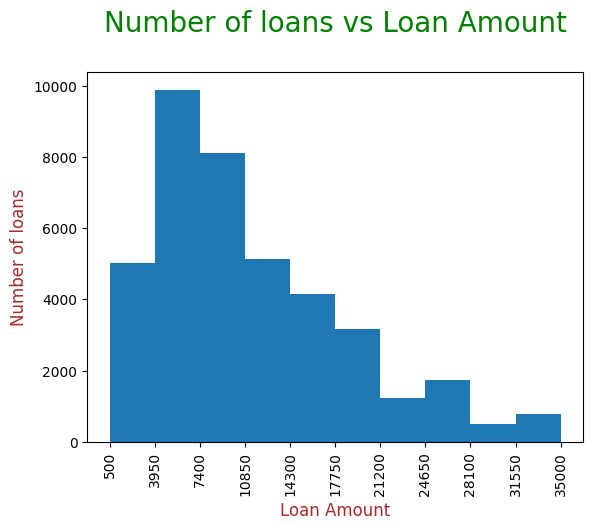

In [42]:
out1,bins,out2  = plt.hist(df.loan_amnt, bins =10)
plt.xticks(bins, rotation=90)
plt.title("Number of loans vs Loan Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

In [43]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [44]:
df['annual_inc'].value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

Text(0, 0.5, 'Interest Rate')

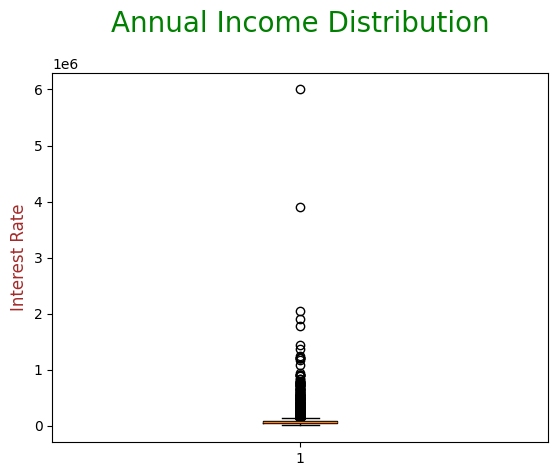

In [45]:
# Annual Income  box plot
plt.boxplot(df.annual_inc)
plt.title("Annual Income Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

In [46]:
df.emp_length.describe()


count    39717.000000
mean         4.974167
std          3.514038
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Text(0, 0.5, 'Interest Rate')

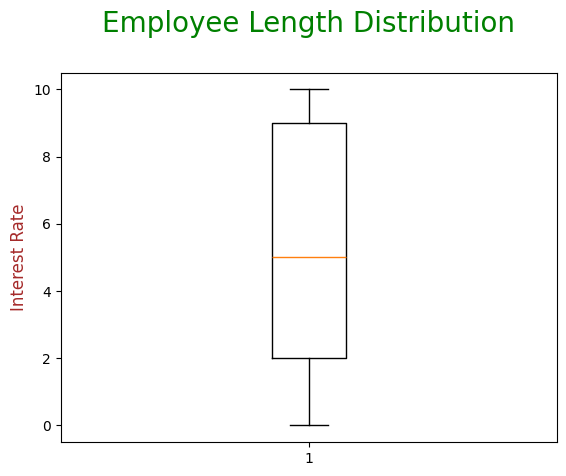

In [47]:
#Box plot of employee length
plt.boxplot(df.emp_length)
plt.title("Employee Length Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

#### Bivariate Analysis

<Axes: xlabel='verification_status', ylabel='count'>

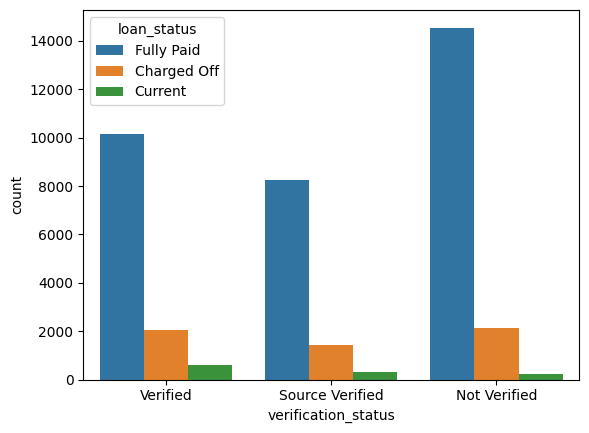

In [82]:
sns.countplot(df,  x="verification_status", hue="loan_status") 

<Axes: xlabel='home_ownership', ylabel='count'>

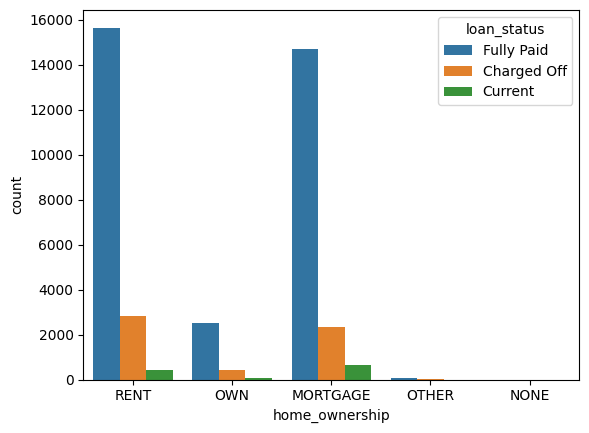

In [48]:
sns.countplot(df, x="home_ownership", hue="loan_status")

<Axes: xlabel='emp_length', ylabel='count'>

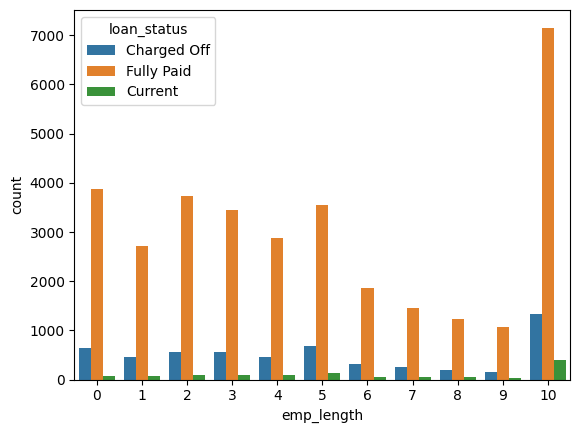

In [49]:

sns.countplot(df, x="emp_length", hue="loan_status")				


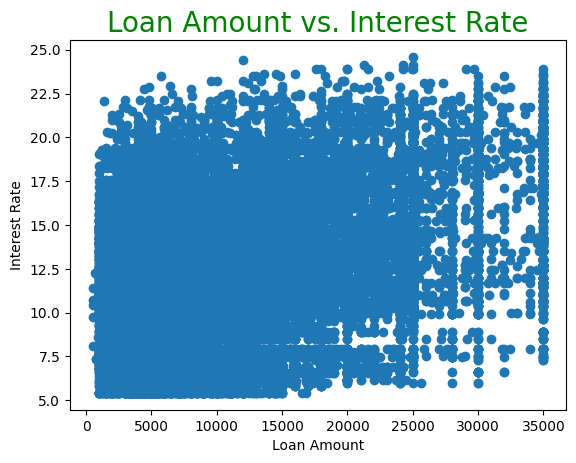

In [50]:
# Scatter plot: loan amount vs interest rate
plt.scatter(df['loan_amnt'], df['int_rate'])
plt.title('Loan Amount vs. Interest Rate',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

<Axes: xlabel='grade', ylabel='count'>

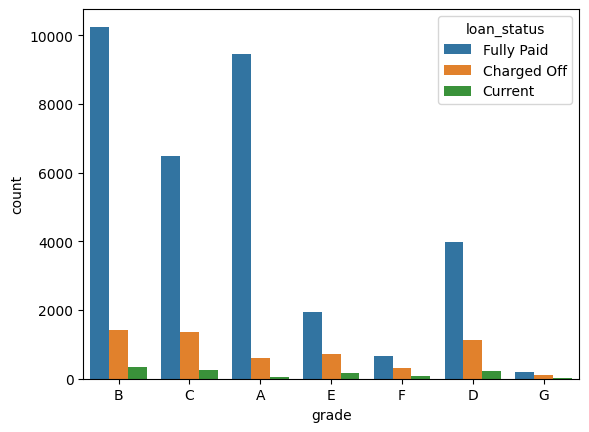

In [51]:
sns.countplot(df, x="grade", hue="loan_status")

#### Multi Variate Analysis

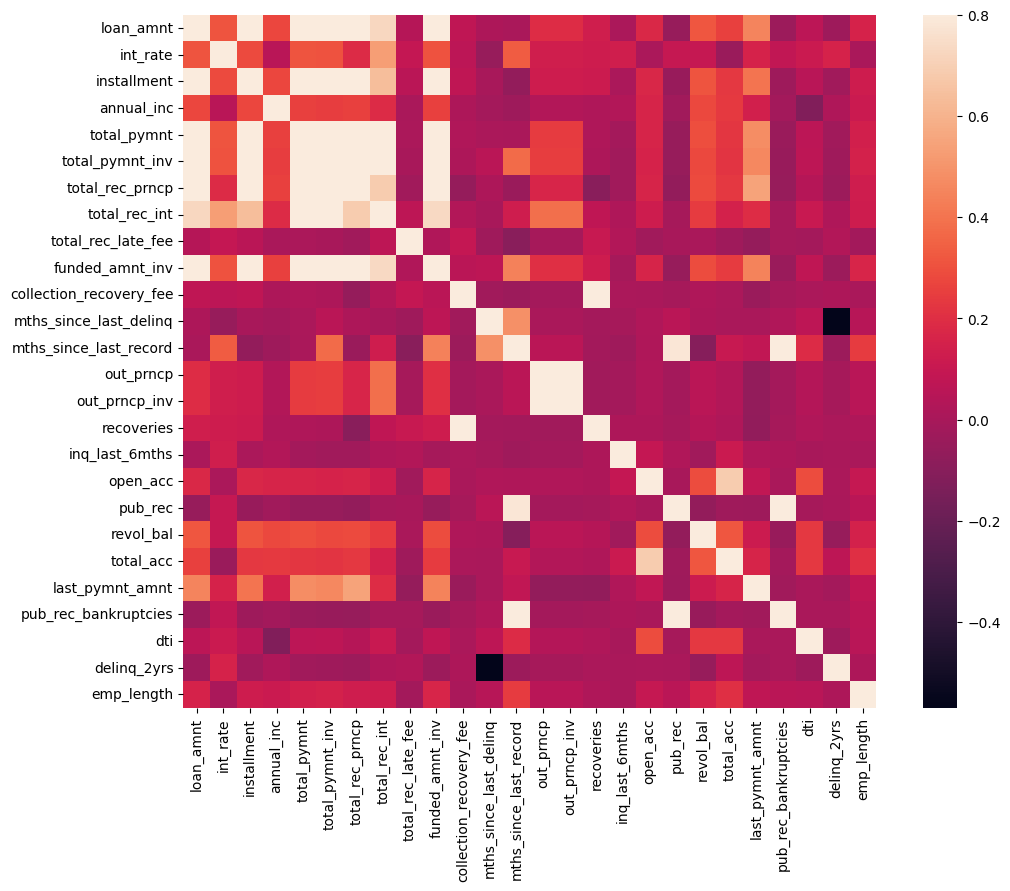

In [52]:
df_corr = df[['loan_amnt','int_rate','installment','annual_inc','total_pymnt',
'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','funded_amnt_inv','collection_recovery_fee',
'mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv' ,'recoveries','inq_last_6mths','open_acc'      
,'pub_rec','revol_bal','total_acc','last_pymnt_amnt','pub_rec_bankruptcies', 'dti','delinq_2yrs','emp_length']] 
corrmat = df_corr.corr() 
f, ax = plt.subplots(figsize=(12, 9))				
sns.heatmap(corrmat, vmax=.8, square=True);				


## b) Analysis on Charged Off / Defaulted Loans

### Univariate Analysis

In [53]:
df_default = df[df['loan_status'] == 'Charged Off']

In [54]:
df_default.shape # 14.17 % of loans are defaulted => 5627 No of loans are defaulted

(5627, 52)

([<matplotlib.patches.Wedge at 0x1e350297b30>,
 [Text(-0.25169605915435955, 1.0708170216270216, ' 36 months'),
  Text(0.25169595889723323, -1.0708170451925028, ' 60 months')],
 [Text(-0.13728875953874156, 0.5840820117965572, '57.3%'),
  Text(0.1372887048530363, -0.584082024650456, '42.7%')])

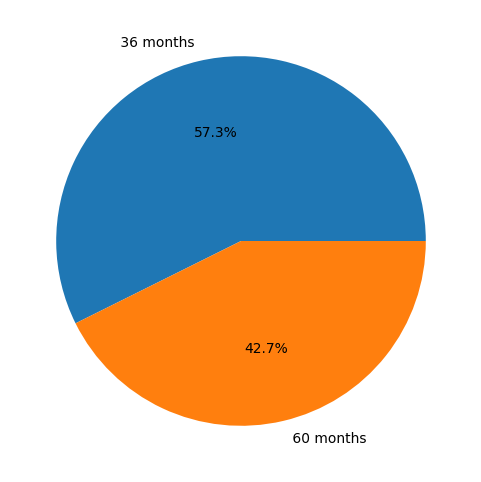

In [55]:
loan_term_counts = df_default['term'].value_counts()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(loan_term_counts.values, labels=loan_term_counts.index, autopct="%1.1f%%") 

<Axes: xlabel='emp_length', ylabel='count'>

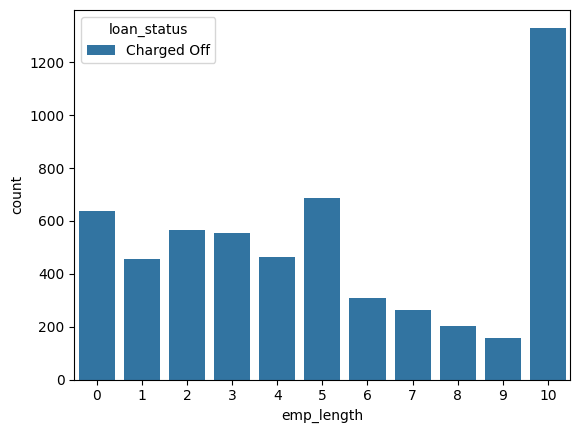

In [56]:
sns.countplot(df_default, x="emp_length", hue="loan_status")	

In [57]:
df_default.int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

Text(0, 0.5, 'Interest Rate')

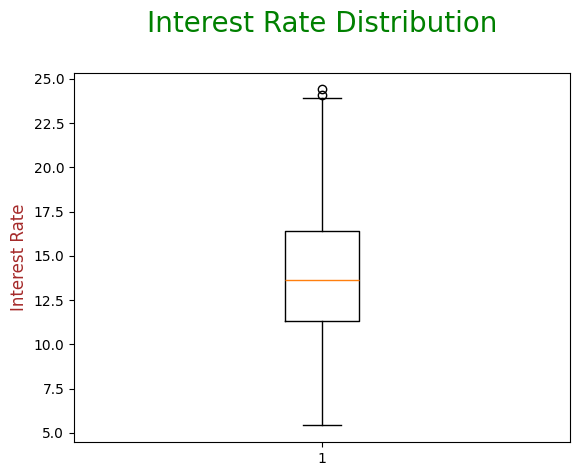

In [58]:
# Interest rate box plot for bad loans
plt.boxplot(df_default.int_rate)
plt.title("Interest Rate Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

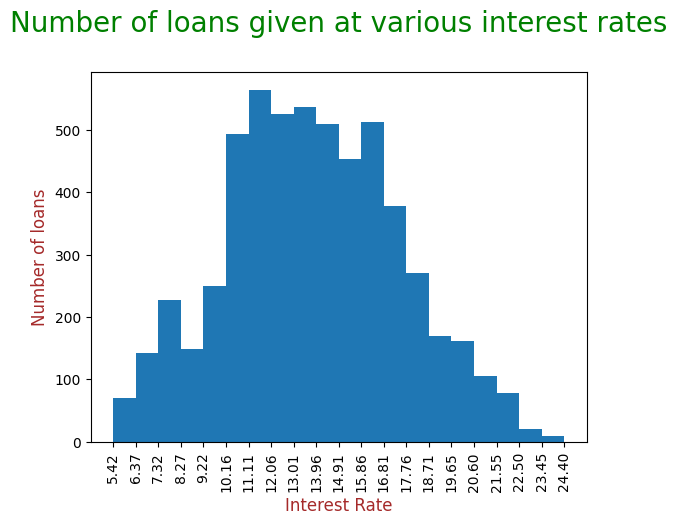

In [59]:
out1,bins,out2  = plt.hist(df_default.int_rate, bins =20)
plt.xticks(bins, rotation=90)
plt.title("Number of loans given at various interest rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})


In [60]:
df_default.loan_amnt.describe()


count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

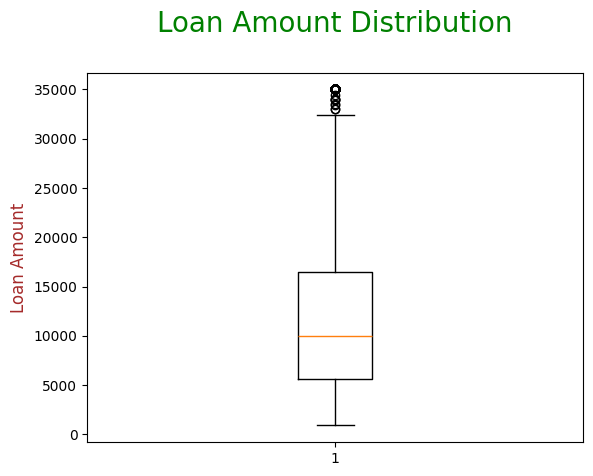

In [61]:
# Loan amount defaulted box plot
plt.boxplot(df_default.loan_amnt)
plt.title("Loan Amount Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Loan Amount', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

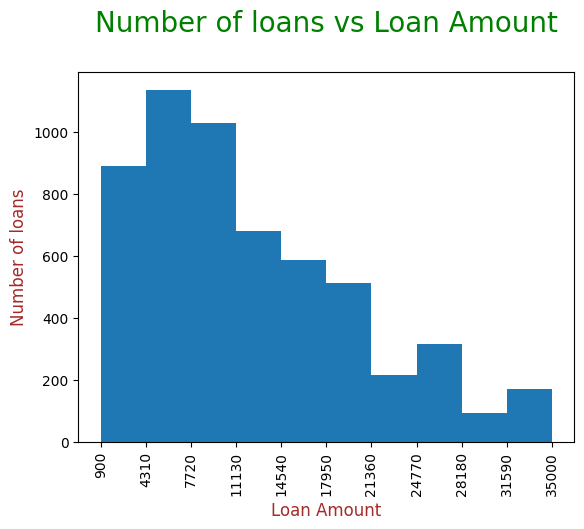

In [62]:

out1,bins,out2  = plt.hist(df_default.loan_amnt, bins =10)
plt.xticks(bins, rotation=90)
plt.title("Number of loans vs Loan Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})


In [63]:
df_default.emp_length.describe()


count    5627.000000
mean        5.077661
std         3.527634
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        10.000000
Name: emp_length, dtype: float64

Text(0, 0.5, 'Interest Rate')

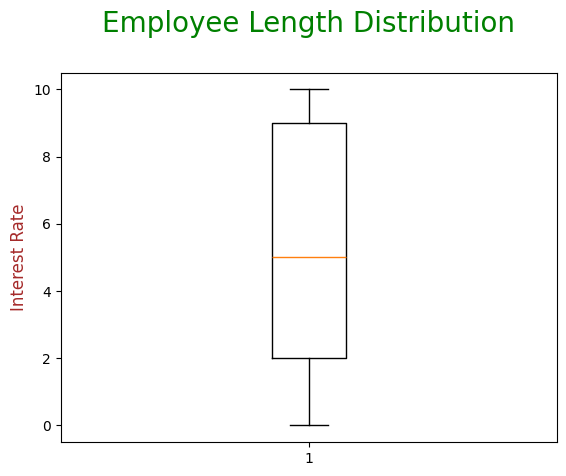

In [64]:
#Box plot of employee length
plt.boxplot(df_default.emp_length)
plt.title("Employee Length Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

### Bivariate Analysis

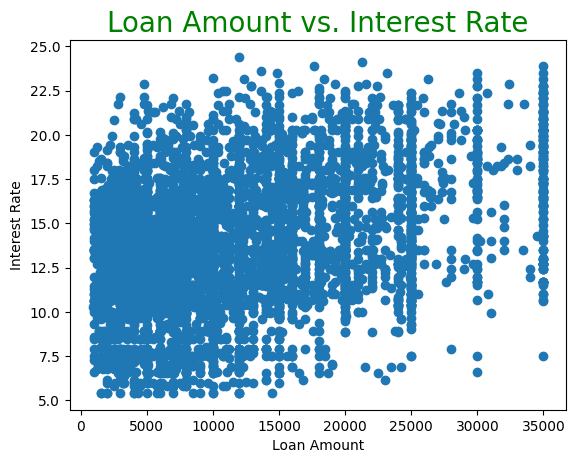

In [65]:
# Scatter plot: loan amount vs interest rate
plt.scatter(df_default['loan_amnt'], df_default['int_rate'])
plt.title('Loan Amount vs. Interest Rate',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


### Multivariate Analysis

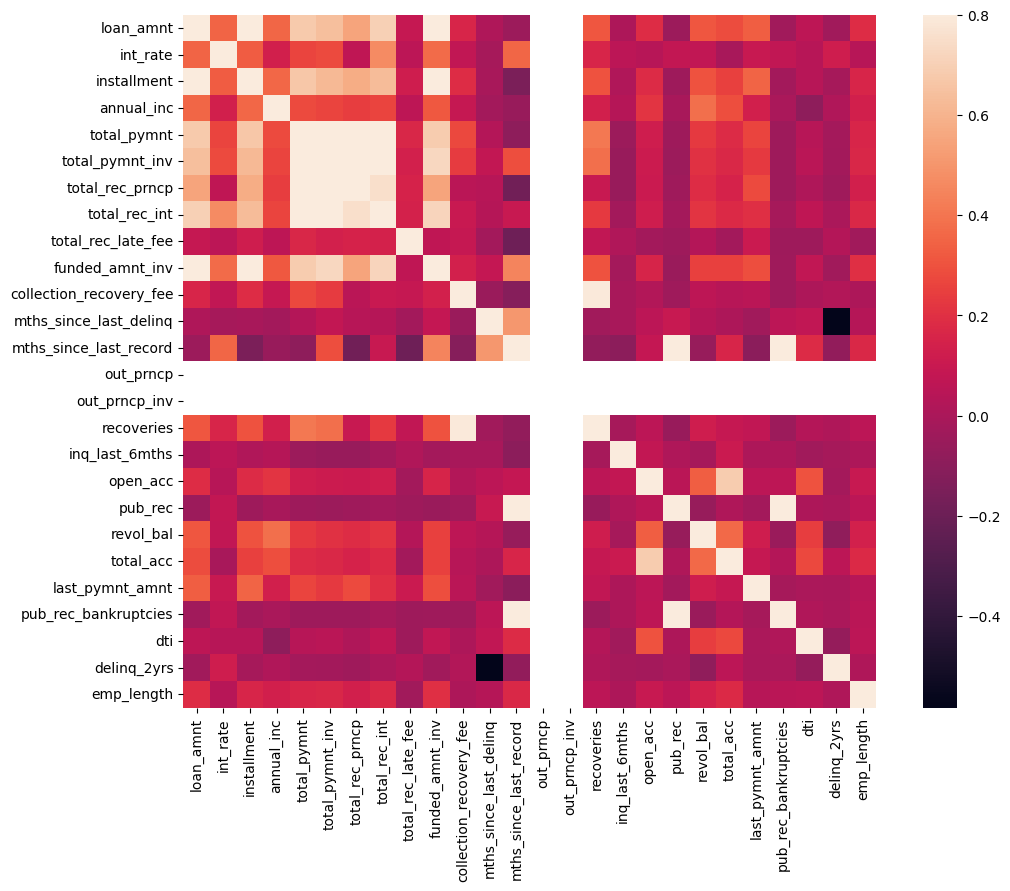

In [66]:
df_corr = df_default[['loan_amnt','int_rate','installment','annual_inc','total_pymnt',
'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','funded_amnt_inv','collection_recovery_fee',
'mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv' ,'recoveries','inq_last_6mths','open_acc'      
,'pub_rec','revol_bal','total_acc','last_pymnt_amnt','pub_rec_bankruptcies', 'dti','delinq_2yrs','emp_length']] 
corrmat = df_corr.corr() 
f, ax = plt.subplots(figsize=(12, 9))				
sns.heatmap(corrmat, vmax=.8, square=True);	

## C) Analysis on Fully Paid Loans

In [67]:
df_paid = df[df['loan_status'] == 'Fully Paid']

In [68]:
df_paid.shape # 83 % of loans are fully paid => 32950 No of loans are paid successfully

(32950, 52)

([<matplotlib.patches.Wedge at 0x1e3503b5820>,
 [Text(-0.858686476861201, 0.6875009341489642, ' 36 months'),
  Text(0.8586864446769588, -0.6875009743469782, ' 60 months')],
 [Text(-0.4683744419242914, 0.3750005095357986, '78.5%'),
  Text(0.4683744243692502, -0.3750005314619881, '21.5%')])

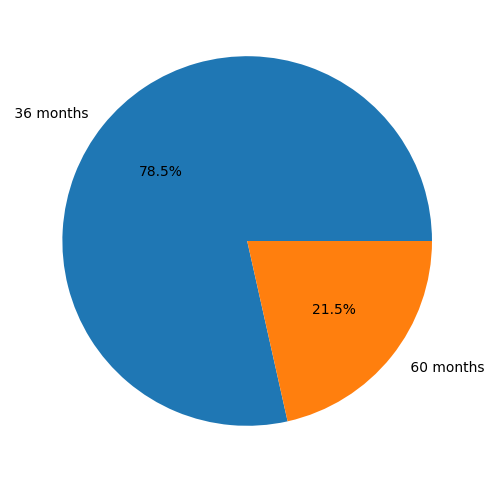

In [69]:
loan_term_counts = df_paid['term'].value_counts()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(loan_term_counts.values, labels=loan_term_counts.index, autopct="%1.1f%%") 

<Axes: xlabel='emp_length', ylabel='count'>

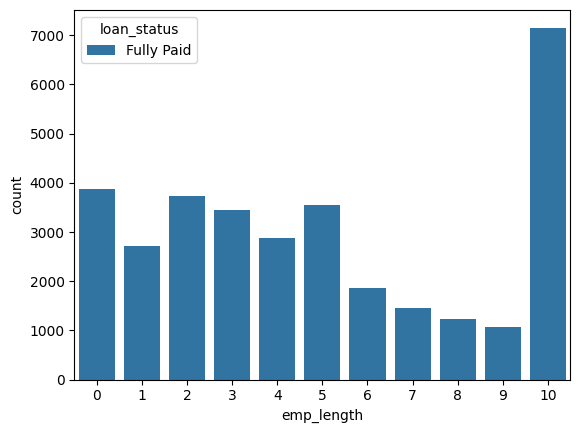

In [70]:
sns.countplot(df_paid, x="emp_length", hue="loan_status")	

In [71]:
df_paid.int_rate.describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64

Text(0, 0.5, 'Interest Rate')

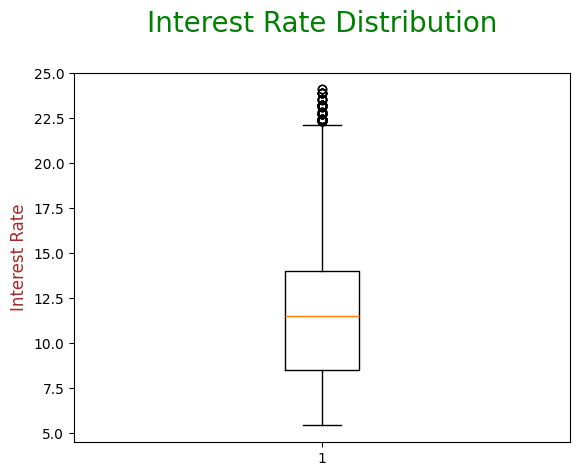

In [72]:
# Interest rate box plot
plt.boxplot(df_paid.int_rate)
plt.title("Interest Rate Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

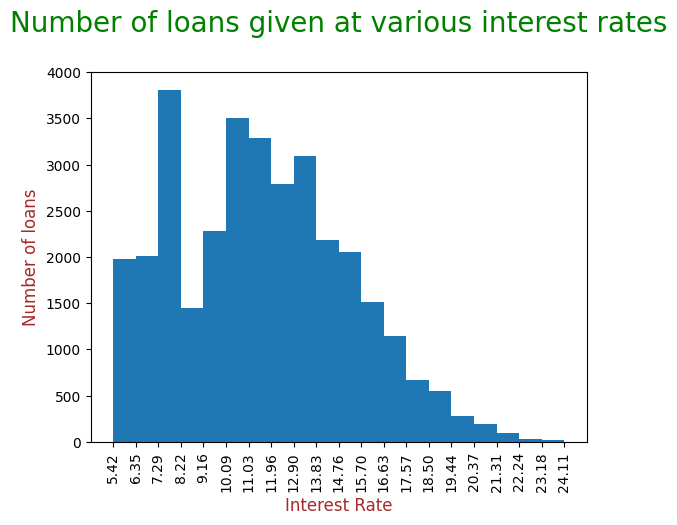

In [73]:

out1,bins,out2  = plt.hist(df_paid.int_rate, bins =20)
plt.xticks(bins, rotation=90)
plt.title("Number of loans given at various interest rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

In [74]:

df_paid.loan_amnt.describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

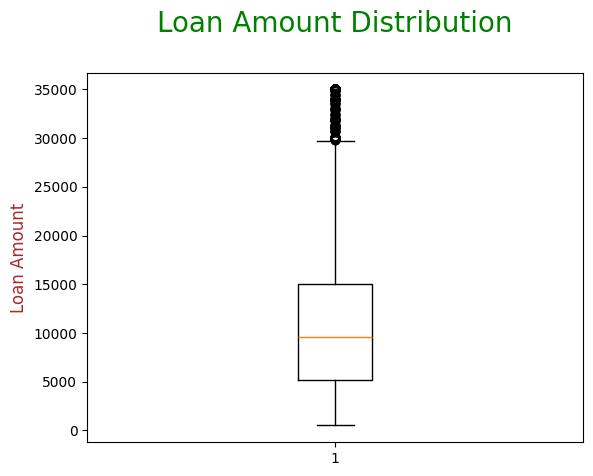

In [75]:
# Interest rate box plot
plt.boxplot(df_paid.loan_amnt)
plt.title("Loan Amount Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Loan Amount', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

Text(0, 0.5, 'Number of loans')

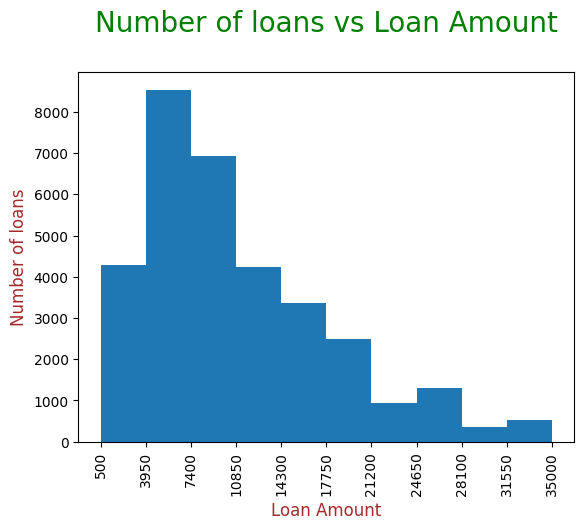

In [76]:
out1,bins,out2  = plt.hist(df_paid.loan_amnt, bins =10)
plt.xticks(bins, rotation=90)
plt.title("Number of loans vs Loan Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

In [77]:
df_paid.emp_length.describe()


count    32950.000000
mean         4.919484
std          3.505511
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: emp_length, dtype: float64

Text(0, 0.5, 'Interest Rate')

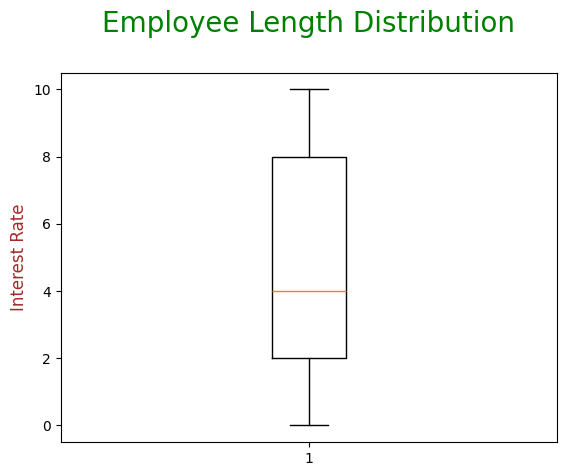

In [78]:

#Box plot of employee length
plt.boxplot(df_paid.emp_length)
plt.title("Employee Length Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

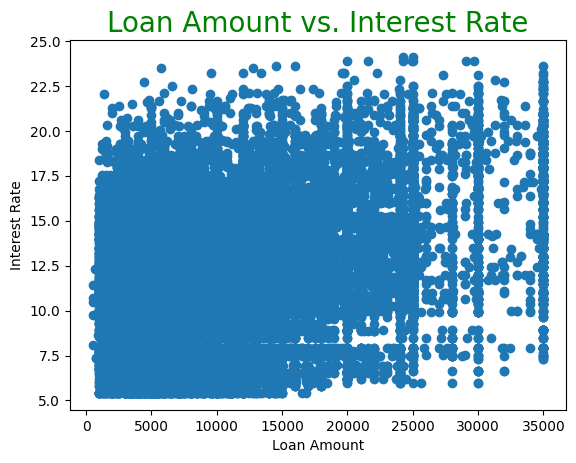

In [79]:
# Scatter plot: loan amount vs interest rate
plt.scatter(df_paid['loan_amnt'], df_paid['int_rate'])
plt.title('Loan Amount vs. Interest Rate',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

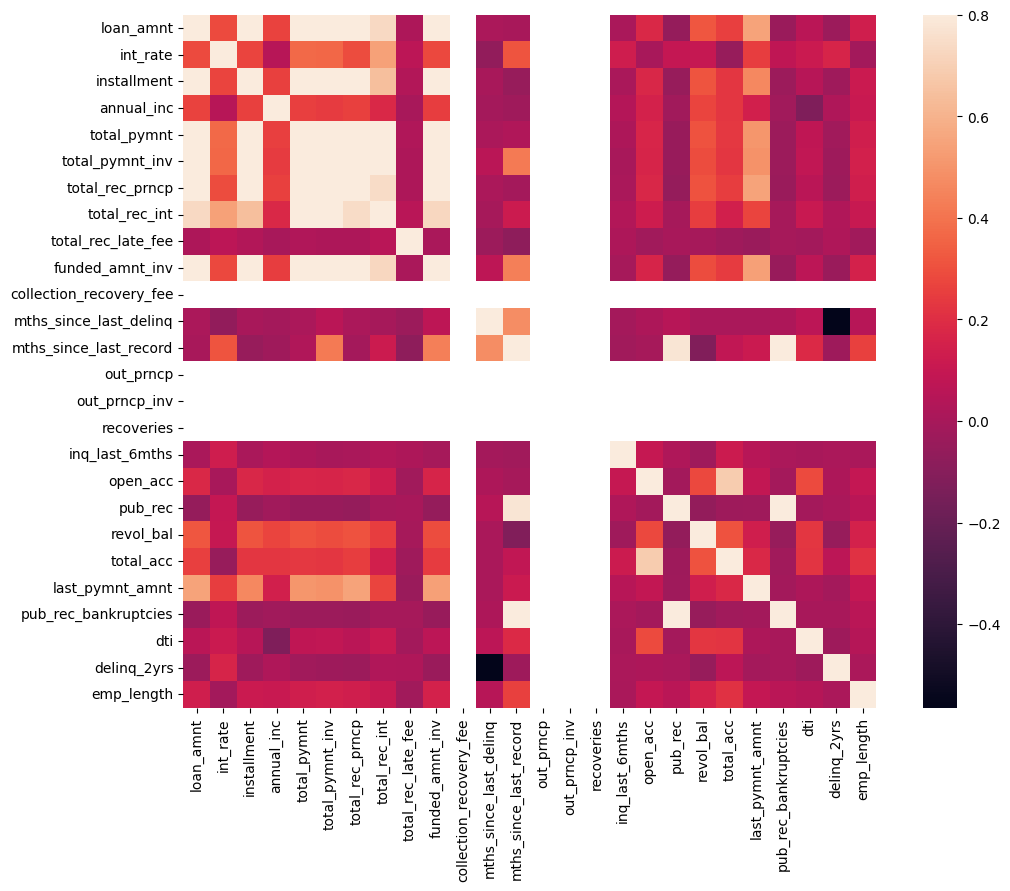

In [80]:

df_corr = df_paid[['loan_amnt','int_rate','installment','annual_inc','total_pymnt',
'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','funded_amnt_inv','collection_recovery_fee',
'mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv' ,'recoveries','inq_last_6mths','open_acc'      
,'pub_rec','revol_bal','total_acc','last_pymnt_amnt','pub_rec_bankruptcies', 'dti','delinq_2yrs','emp_length']] 
corrmat = df_corr.corr() 
f, ax = plt.subplots(figsize=(12, 9))				
sns.heatmap(corrmat, vmax=.8, square=True);	